## Regression on Boston Housing Dataset

**En este cuaderno, realizamos un estudio comparativo de la precisión de la regresión lineal y la regresión polinomial en el conjunto de datos de viviendas de Boston**

En este cuaderno, realizamos un estudio comparativo de la precisión de la regresión lineal y la regresión polinomial en el conjunto de datos de viviendas de Boston **

Estos datos originalmente formaban parte del Repositorio de aprendizaje automático de UCI y ahora se han eliminado. Estos datos también se envían con la biblioteca scikit-learn.
Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas.

La descripción de todas las varuables se da a continuación:

**CRIM**: Tasa de delincuencia per cápita por ciudad

**ZN**: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados

**INDUS**: Proporción de acres comerciales no minoristas por ciudad

**CHAS**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)

**NOX**: concentración de óxido nítrico (partes por 10 millones)

**RM**: Número medio de habitaciones por vivienda

**EDAD**: Proporción de unidades ocupadas por el propietario construidas antes de 1940

**DIS**: distancias ponderadas a cinco centros de empleo de Boston

**RAD**: Índice de accesibilidad a carreteras radiales

**IMPUESTO**: Tasa de impuesto a la propiedad de valor total por $ 10,000

**B**: 1000 (Bk - 0.63) ², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

**LSTAT**: Porcentaje de menor estatus de la población

**MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000
  
  



### Realiza un estudio comparativo de los modelos de regresión lineal simple y regresión lineal múltiple (aplicando métodos de selección de variables).

Importamos las librerías

In [132]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 


Cargamos el dataset

In [133]:
# Load Boston housing dataset from external source
boston = pd.read_csv("../data/BostonHousing.csv")

# Display the first few rows of the dataset
print("Boston Housing Dataset:")
print(boston.head())

Boston Housing Dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Preprocesado de datos

In [134]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_41615/1783532825.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


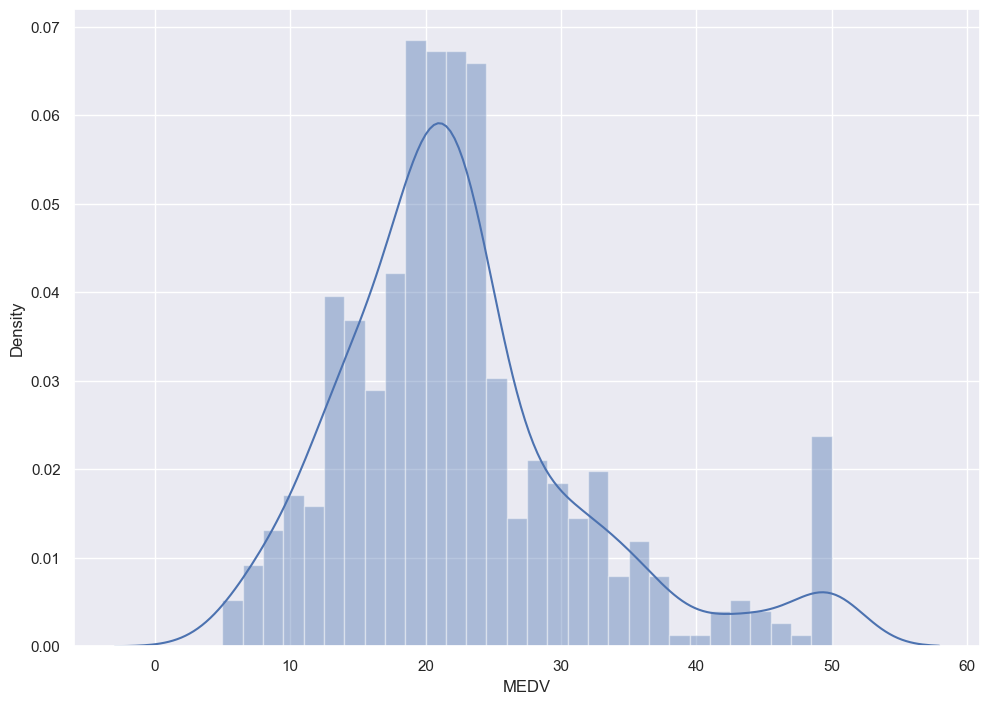

In [135]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(boston['MEDV'], bins=30)
plt.show()

Vemos las correlaciones entre variables.

In [136]:
correlation_matrix = boston.corr().round(2)

<Axes: >

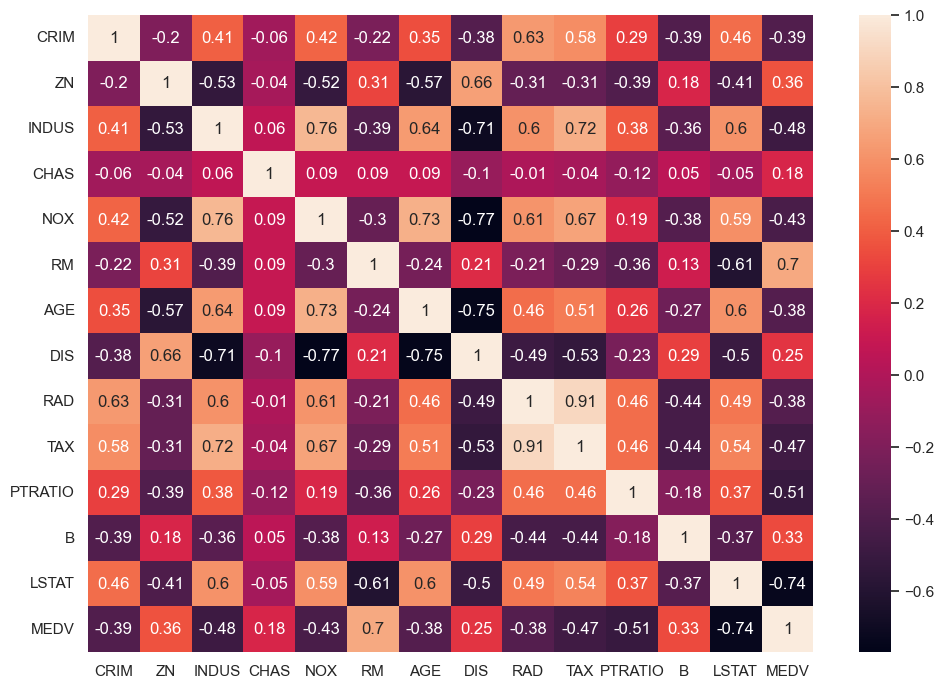

In [137]:
sns.heatmap(data=correlation_matrix, annot=True)

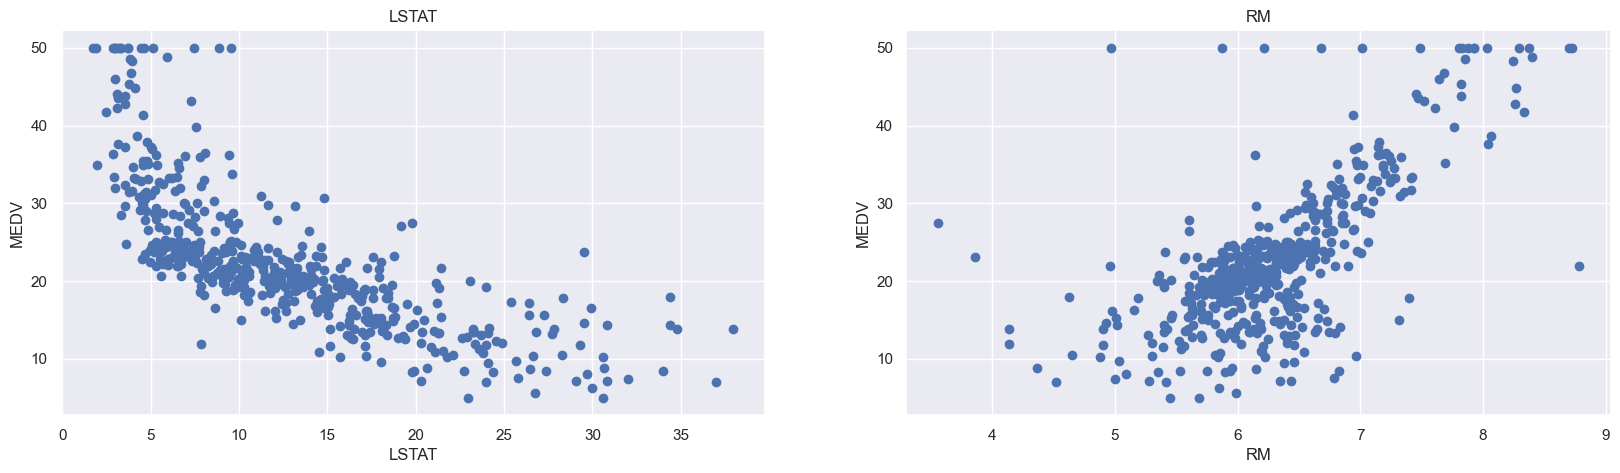

In [138]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [139]:
X = pd.DataFrame(boston['LSTAT'], columns = ['LSTAT'])
Y = boston['MEDV']

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


# **Linear Regression**

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.552301990803739


The model performance for testing set
--------------------------------------
RMSE is 6.230716573098682
R2 score is 0.5041523728903131


In [143]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
#plt.scatter(Y_test, y_test_predict)
#plt.show()

# **MULTIPLE REGRESION**

### OPCIÓN 1

In [144]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
Y = boston['MEDV']

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [146]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


### OPCIÓN 2

In [148]:
X = boston.iloc[:,:-1]
Y = boston['MEDV']

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [150]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sbs = SFS(LinearRegression(),k_features=3,forward=False,floating=False)
sbs.fit(np.array(X_train), Y_train)

,estimator,LinearRegression()
,k_features,"(3, ...)"
,forward,False
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [151]:
sbs.k_feature_names_

('5', '10', '12')

In [152]:
[X.columns[int(index)] for index in list(sbs.k_feature_idx_)]

['RM', 'PTRATIO', 'LSTAT']

In [153]:
X = boston[[X.columns[int(index)] for index in list(sbs.k_feature_idx_)]]
Y = boston['MEDV']

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [155]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [156]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.30386319330793
R2 score is 0.6725214335656512


The model performance for testing set
--------------------------------------
RMSE is 4.913937534764078
R2 score is 0.6915878280744177


# Opción 3

In [157]:
X = boston.iloc[:,:-1]
Y = boston['MEDV']

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [159]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [160]:
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(LinearRegression(),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    regression = LinearRegression()
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],
                   y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)]
                                           for index in list(sbs.k_feature_idx_)]])
    r2 = r2_score(y_pred = y_pred, y_true = y_test)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({
        "variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],
        "r2": r2})],ignore_index = True)


In [161]:
dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)

,variables,r2
0,"[CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, RAD, TAX...",0.733447
1,"[CRIM, ZN, INDUS, NOX, RM, DIS, RAD, TAX, PTRA...",0.727339
2,"[CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,...",0.726507
3,"[RM, DIS, TAX, PTRATIO, B, LSTAT]",0.711065
4,"[RM, DIS, RAD, TAX, PTRATIO, B, LSTAT]",0.704453
5,"[RM, DIS, PTRATIO, B, LSTAT]",0.704453
6,"[CRIM, ZN, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT]",0.698933
7,"[RM, DIS, PTRATIO, LSTAT]",0.696482
8,"[CRIM, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT]",0.694351
9,"[RM, PTRATIO, LSTAT]",0.691588


In [162]:
X = boston[dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)["variables"][0]]

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [164]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [165]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741037094745279
R2 score is 0.7383354069764188


The model performance for testing set
--------------------------------------
RMSE is 4.568307908813952
R2 score is 0.7334473631831905
